In [ ]:
# 3. Úvod do lineární algebry

In [2]:
# Gaussova eliminační metoda

import numpy as np

def gaussova_eliminacni_metoda(A, b): # A = matice koeficientů neznámých, b = vektor výsledků jednotlivých rovnic soustavy
    # Získání počtu koeficientů (počet rovnic)
    pocet_rovnic = len(A)
    
    # Vytvoření rozšířené matice spojením matice A s vektorem b
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)   # přetypování na desetinné číslo
    print("Původní rozšířená matice:")
    display(rozsirena_matice)

    # Přímá eliminace
    for i in range(pocet_rovnic):
        # Eliminace prvků pod vedoucím prvkem 
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    print("\nRozšířená matice v horním trojúhelníkovém tvaru:")
    print(rozsirena_matice)

    # Zpětná substituce
    x = np.zeros(pocet_rovnic)  # vytvoření pole x, naplněného nulovými hodnotami, za které se pak dosadí daná řešení
    for i in range(pocet_rovnic - 1, -1, -1): # procházení matice v horním trojúhelníkovém tvaru od posledního řádku k prvnímu
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i]  # zjištění daného řešení
    
    return x

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]])
b = np.array([8, -11, -3])

reseni = gaussova_eliminacni_metoda(A, b)
print("\nŘešení soustavy lineárních rovnic:")
print(reseni)
print("\nOvěření pomocí numpy.linalg.solve:")
print(np.linalg.solve(A, b))


Původní rozšířená matice:
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]

Rozšířená matice v horním trojúhelníkovém tvaru:
[[ 2.   1.  -1.   8. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   0.  -1.   1. ]]

Řešení soustavy lineárních rovnic:
[ 2.  3. -1.]

Ověření pomocí numpy.linalg.solve:
[ 2.  3. -1.]


In [14]:

import numpy as np
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x
D = np.array([[2,2,-3,1],
              [1,2,4,2],
              [-1,1,-1,1],
              [1,-1,2,-2]])
d = np.array([3,5,1,-4])

reseni = gaussova_eliminacni_metoda(D,d)
print("\nŘešení soustavy lineárních rovnic:")
print(reseni)
print("\nOvěření pomocí numpy.linalg.solve:")
print(np.linalg.solve(D,d))



Řešení soustavy lineárních rovnic:
[ 1.00000000e+00 -1.00000000e+00 -6.57909941e-17  3.00000000e+00]

Ověření pomocí numpy.linalg.solve:
[ 1. -1.  0.  3.]


In [62]:
# Matice 1x1
A = np.array([[1]])
a = np.array([2])

# Matice 2x2
B = np.array([[1,1],
             [2,-1]])
b = np.array([8,1])

# Matice 3x3
C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])

# Matice 4x4
D = np.array([[10, -1, 2, 0],
        [-1, 11, -1, 3],
        [2, -1, 10, -1],
        [0, 3, -1, 8]])
d = np.array([6, 25, -11, 15])

# Matice 5x5
E = np.array([[5,7,9,-28,1],
              [-3,0,12,5,0],
              [2,7,19,-23,1],
              [1,1,1,-1,1],
              [0,5,17,-21,3]])
e = np.array([-14,25,11,0,11])


###############################################################################################################xx

import numpy as np
def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

E = np.array([[2, -1, 0, 0, 0],
              [-1, 2, -1, 0, 0],
              [0, -1, 2, -1, 0],
              [0, 0, -1, 2, -1],
              [0, 0, 0, -1, 2]])
e = np.array([1, 2, 3, 4, 5])

print("Řešení přímou metodou:")
print(gaussova_eliminacni_metoda(A,a))
print(gaussova_eliminacni_metoda(B,b))
print(gaussova_eliminacni_metoda(C,c))
print(gaussova_eliminacni_metoda(D,d))
print(gaussova_eliminacni_metoda(E,e))

###############################################################################################################
print("Správné řešení:")
print(np.linalg.solve(A,a))
print(np.linalg.solve(B,b))
print(np.linalg.solve(C,c))
print(np.linalg.solve(D,d))
print(np.linalg.solve(E,e))
################################################################################################################
def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

print("Řešení iterační metodou:")
print(gaussova_seidelova_iterace(A,a))
print(gaussova_seidelova_iterace(B,b))
print(gaussova_seidelova_iterace(C,c))
print(gaussova_seidelova_iterace(D,d))
print(gaussova_seidelova_iterace(E,e))


Řešení přímou metodou:
[2.]
[3. 5.]
[ 2.  4. -1.]
[ 1.  2. -1.  1.]
[ 5.83333333 10.66666667 13.5        13.33333333  9.16666667]
Správné řešení:
[2.]
[3. 5.]
[ 2.  4. -1.]
[ 1.  2. -1.  1.]
[ 5.83333333 10.66666667 13.5        13.33333333  9.16666667]
Řešení iterační metodou:
[2.]
[-2.67877152e+301 -5.35754304e+301]
[ 2.          3.99999999 -1.        ]
[ 1.  2. -1.  1.]
[ 5.83333331 10.66666663 13.49999996 13.3333333   9.16666665]


Čas pro metodu Gaussovy eliminace pro 1x1: 9.73999995039776e-05 s
Čas pro metodu Gauss-Seidel pro 1x1: 0.00035430000571068376 s
Čas pro metodu Gaussovy eliminace pro 2x2: 8.030000026337802e-05 s
Čas pro metodu Gauss-Seidel pro 2x2: 0.07454339999821968 s
Čas pro metodu Gaussovy eliminace pro 3x3: 0.00011939999967580661 s
Čas pro metodu Gauss-Seidel pro 3x3: 0.006470899999840185 s
Čas pro metodu Gaussovy eliminace pro 4x4: 9.490000229561701e-05 s
Čas pro metodu Gauss-Seidel pro 4x4: 0.0008770999993430451 s


C:\Users\filip\AppData\Local\Temp\ipykernel_19224\2081488661.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]


Čas pro metodu Gaussovy eliminace pro 5x5: 9.560000034980476e-05 s
Čas pro metodu Gauss-Seidel pro 5x5: 0.2197916000004625 s


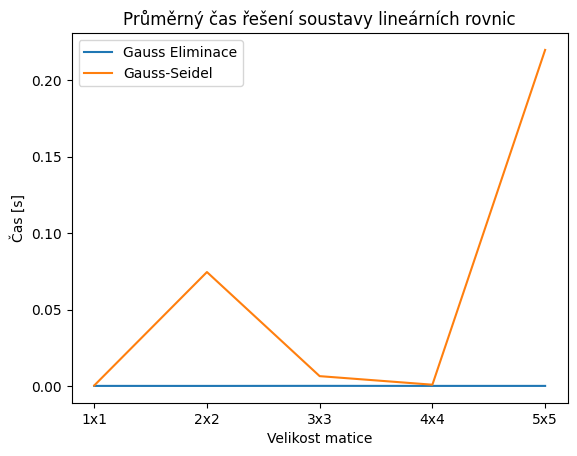

In [66]:
import numpy as np
import time
import matplotlib.pyplot as plt

def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

def cas_gauss_elim(A, b):
    start_time = time.perf_counter()
    gaussova_eliminacni_metoda(A, b)
    return time.perf_counter() - start_time

def cas_gauss_seidel(A, b):
    start_time = time.perf_counter()
    gaussova_seidelova_iterace(A, b)
    return time.perf_counter() - start_time

matice = {
    "1x1": (np.array([[1]]), np.array([2])),
    "2x2": (np.array([[1,1], [2,-1]]), np.array([8,1])),
    "3x3": (np.array([[3,-2,5], [1,1,2], [-2,1,-6]]), np.array([-7,4,6])),
    "4x4": (np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]]), np.array([6, 25, -11, 15])),
    "5x5": (np.array([[5,7,9,-28,1],[-3,0,12,5,0],[2,7,19,-23,1],[1,1,1,-1,1],[0,5,17,-21,3]]), np.array([-14,25,11,0,11]))
}


cas_gauss_elim_list = []
cas_gauss_seidel_list = []

for nazev, (A, b) in matice.items():
    cas_elim = cas_gauss_elim(A, b)
    cas_gauss_elim_list.append(cas_elim)

    cas_seidel = cas_gauss_seidel(A, b)
    cas_gauss_seidel_list.append(cas_seidel)

    print(f"Čas pro metodu Gaussovy eliminace pro {nazev}: {cas_elim} s")
    print(f"Čas pro metodu Gauss-Seidel pro {nazev}: {cas_seidel} s")

plt.plot(list(matice.keys()), cas_gauss_elim_list, label="Gauss Eliminace")
plt.plot(list(matice.keys()), cas_gauss_seidel_list, label="Gauss-Seidel")
plt.xlabel("Velikost matice")
plt.ylabel("Čas [s]")
plt.title("Průměrný čas řešení soustavy lineárních rovnic")
plt.legend()
plt.show()


Čas pro metodu Gaussovy eliminace pro 1x1: 0.00012040000001434237 s
Čas pro metodu Gauss-Seidel pro 1x1: 0.0003476999991107732 s
Čas pro metodu Gaussovy eliminace pro 2x2: 0.00013339999713934958 s
Čas pro metodu Gauss-Seidel pro 2x2: 0.14063380000152392 s
Čas pro metodu Gaussovy eliminace pro 3x3: 9.090000094147399e-05 s
Čas pro metodu Gauss-Seidel pro 3x3: 0.005994099999952596 s
Čas pro metodu Gaussovy eliminace pro 4x4: 0.00024220000341301784 s
Čas pro metodu Gauss-Seidel pro 4x4: 0.001111799996579066 s
Čas pro metodu Gaussovy eliminace pro 5x5: 0.00012509999942267314 s
Čas pro metodu Gauss-Seidel pro 5x5: 0.006932500000402797 s


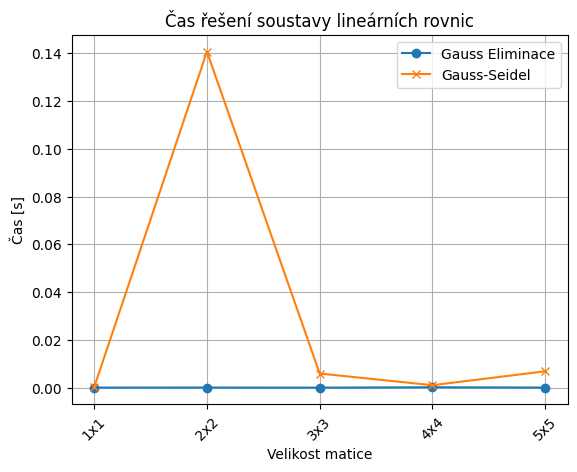

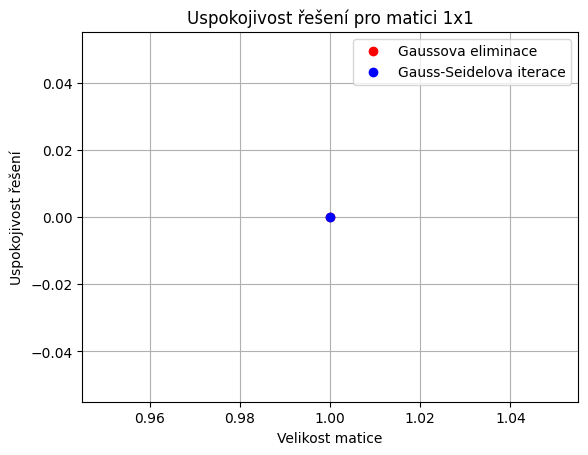

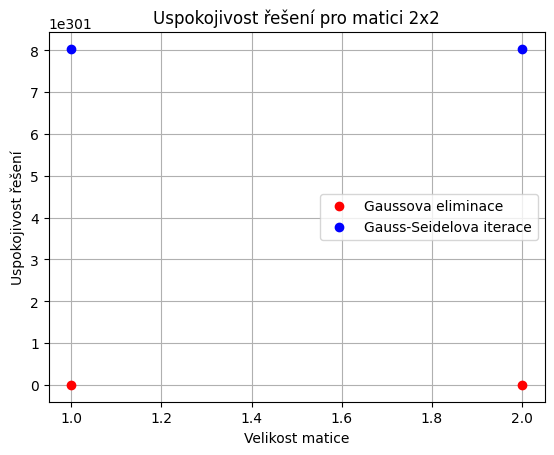

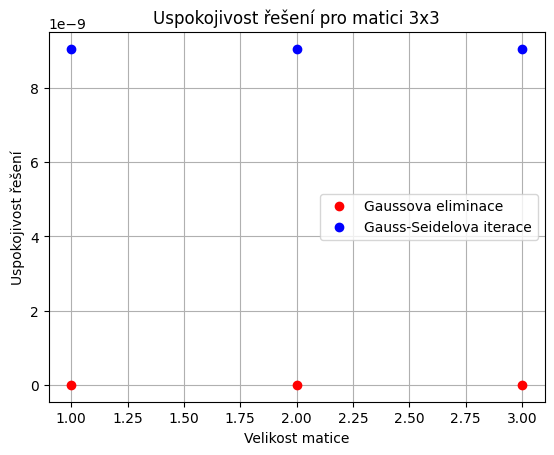

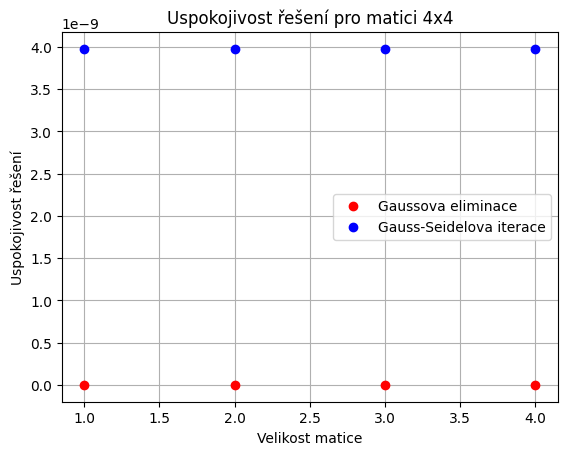

C:\Users\filip\AppData\Local\Temp\ipykernel_19224\835314034.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]


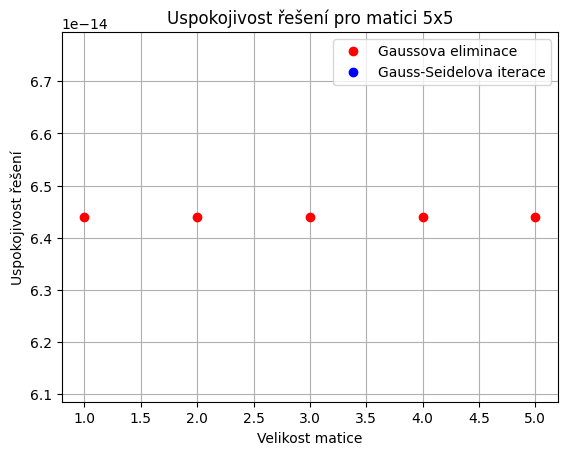

In [69]:
import numpy as np
import time
import matplotlib.pyplot as plt

def gaussova_eliminacni_metoda(A, b):
    pocet_rovnic = len(A)
    rozsirena_matice = np.column_stack((A, b)).astype(np.float64)  
    for i in range(pocet_rovnic):
        if rozsirena_matice[i, i] == 0.0:
            print("Dělíš nulou!!!")
        for j in range(i + 1, pocet_rovnic):
            pomer = rozsirena_matice[j, i] / rozsirena_matice[i, i]
            rozsirena_matice[j] -= pomer * rozsirena_matice[i]

    x = np.zeros(pocet_rovnic) 
    for i in range(pocet_rovnic - 1, -1, -1): 
        x[i] = (rozsirena_matice[i, -1] - np.dot(rozsirena_matice[i, :-1], x)) / rozsirena_matice[i, i] 
    
    return x

def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_) 
    for pocet_iteraci in range(1, max_iteraci+1):
        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci 
    return x

def cas_gauss_elim(A, b):
    start_time = time.perf_counter()
    gaussova_eliminacni_metoda(A, b)
    return time.perf_counter() - start_time

def cas_gauss_seidel(A, b):
    start_time = time.perf_counter()
    gaussova_seidelova_iterace(A, b)
    return time.perf_counter() - start_time

matice = {
    "1x1": (np.array([[1]]), np.array([2])),
    "2x2": (np.array([[1,1], [2,-1]]), np.array([8,1])),
    "3x3": (np.array([[3,-2,5], [1,1,2], [-2,1,-6]]), np.array([-7,4,6])),
    "4x4": (np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]]), np.array([6, 25, -11, 15])),
    "5x5": (np.array([[2, -1, 0, 0, 0], [-1, 2, -1, 0, 0], [0, -1, 2, -1, 0], [0, 0, -1, 2, -1], [0, 0, 0, -1, 2]]), np.array([1, 2, 3, 4, 5]))
}

cas_gauss_elim_list = []
cas_gauss_seidel_list = []

for nazev, (A, b) in matice.items():
    cas_elim = cas_gauss_elim(A, b)
    cas_gauss_elim_list.append(cas_elim)

    cas_seidel = cas_gauss_seidel(A, b)
    cas_gauss_seidel_list.append(cas_seidel)

    print(f"Čas pro metodu Gaussovy eliminace pro {nazev}: {cas_elim} s")
    print(f"Čas pro metodu Gauss-Seidel pro {nazev}: {cas_seidel} s")

plt.plot(list(matice.keys()), cas_gauss_elim_list, label="Gauss Eliminace", marker='o')
plt.plot(list(matice.keys()), cas_gauss_seidel_list, label="Gauss-Seidel", marker='x')
plt.xlabel("Velikost matice")
plt.ylabel("Čas [s]")
plt.title("Čas řešení soustavy lineárních rovnic")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()





In [52]:
import numpy as np

def gaussova_seidelova_iterace(A, b, tolerance=1e-10, max_iteraci=1000):
    x = np.zeros_like(b, np.float_)  # vytvoření vektoru řešení 
    for pocet_iteraci in range(1, max_iteraci+1):

        x_po_iteraci = np.zeros_like(x, dtype=np.float_)
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_po_iteraci[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_po_iteraci[i] = (b[i] - s1 - s2) / A[i, i]

        # break pokud je rozdíl mezi řešeními menší než tolerance (výchozí =1e-10)
        if np.allclose(x, x_po_iteraci, rtol=tolerance):
            break
        x = x_po_iteraci # přiřazení hodnoty x
    return x

C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])

reseni = gaussova_seidelova_iterace(C,c)
print("Výsledek soustavy lineárních rovnic:")
print(reseni)


Výsledek soustavy lineárních rovnic:
[ 2.          3.99999999 -1.        ]


In [54]:
C = np.array([[3,-2,5],
              [1,1,2],
              [-2,1,-6]])
c = np.array([-7,4,6])
print(np.linalg.solve(C,c))


[ 2.  4. -1.]
